In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt

X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
Y_train = pd.read_csv('../data/Y_train.csv')
Y_test = pd.read_csv('../data/Y_test.csv')

enc = KBinsDiscretizer(n_bins=20, encode="ordinal", strategy="quantile")
Y_train_binned = enc.fit_transform(Y_train)
Y_test_binned = enc.fit_transform(Y_test)

Y_train_binned = Y_train_binned.ravel()
Y_test_binned=Y_test_binned.ravel()

# Random Forest
Applichiamo la random forst eseguendo tuning dei parametri con la GridSearchCV. Andiamo a vedere l'accuracy del modello e stampiamo la confusion matrix.

N trees 27: train accuracy: 0.9995728321230244, test accuracy: 0.30204778156996587
Fitting 8 folds for each of 1 candidates, totalling 8 fits
Grid: train accuracy: 1.0, test accuracy: 0.3003412969283277



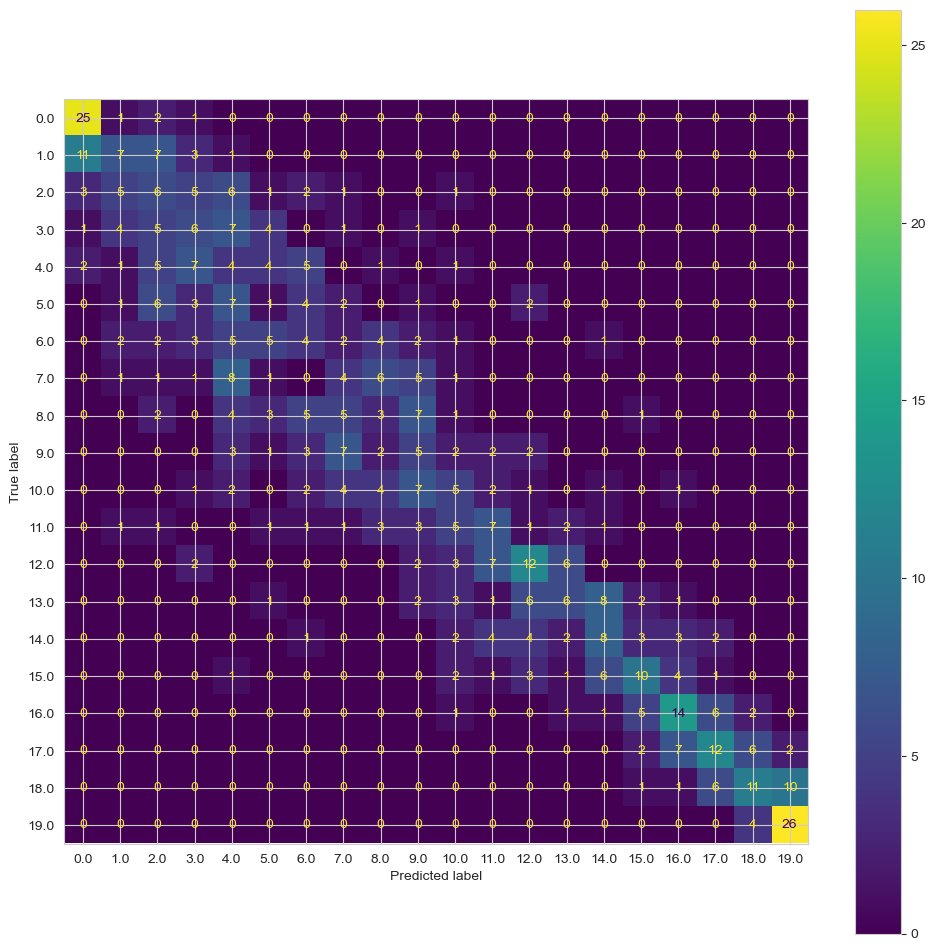

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

def RandomForestSelector():
    #Tuning della random Forest classifier

    rf=RandomForestClassifier(n_estimators=27)
    rf.fit(X_train,Y_train_binned)
    acc_train = accuracy_score(y_true=Y_train_binned, y_pred=rf.predict(X_train))
    acc_test  = accuracy_score(y_true=Y_test_binned, y_pred=rf.predict(X_test))
    print('N trees {}: train accuracy: {}, test accuracy: {}'.format(27,acc_train,acc_test))

    properties={
        #min_sample_leaf piu piccolo possibile
        #max feature piu grande possibile
        #min_samples_split piu' piccolo possibile
        #max_leaf_nodes piu' grande possibile
        #max_samples piu' alto possibile
    }

    grid=GridSearchCV(rf,properties,scoring="neg_mean_squared_error",cv=8,n_jobs=-1,return_train_score=True,verbose=2, refit=True)
    grid.fit(X_train,Y_train_binned)
    acc_train = accuracy_score(y_true=Y_train_binned, y_pred=grid.predict(X_train))
    acc_test  = accuracy_score(y_true=Y_test_binned, y_pred=grid.predict(X_test))

    print('Grid: train accuracy: {}, test accuracy: {}'.format(acc_train,acc_test))
    print()

    cm = ConfusionMatrixDisplay.from_estimator(
        estimator=grid,
        X=X_test, y=Y_test_binned)
    fig = cm.ax_.get_figure()
    fig.set_figwidth(12)
    fig.set_figheight(12)

RandomForestSelector()